# Find relevant tracts size

For each department, we will find which tracts intersect with it, and, the size of this intersection.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from cpe_help import Census, list_departments
from cpe_help import util

In [2]:
dept_lst = list_departments()
dept = dept_lst[0]
dept

# Boston - Massachusetts

Department('11-00091')

In [3]:
census = Census()
census

## Load department data

In [4]:
dept.load_guessed_state()

'25'

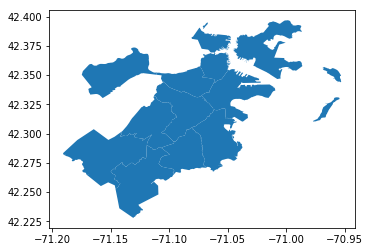

In [5]:
police_districts = dept.load_preprocessed_shapefile()
police_districts.plot()

In [6]:
police_districts.crs

# add no_defs

{'init': 'epsg:4326'}

## Load census data

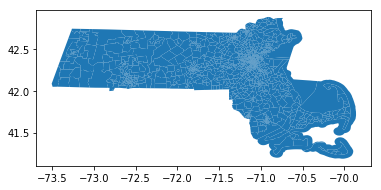

In [7]:
tracts = census.load_tract_boundaries('25')
tracts = tracts.set_index('GEOID')
tracts.plot()

In [8]:
tracts.crs

{'init': 'epsg:4269'}

## Prepare CRS

In [9]:
police_districts = police_districts.to_crs(tracts.crs)

## Visualize overlay

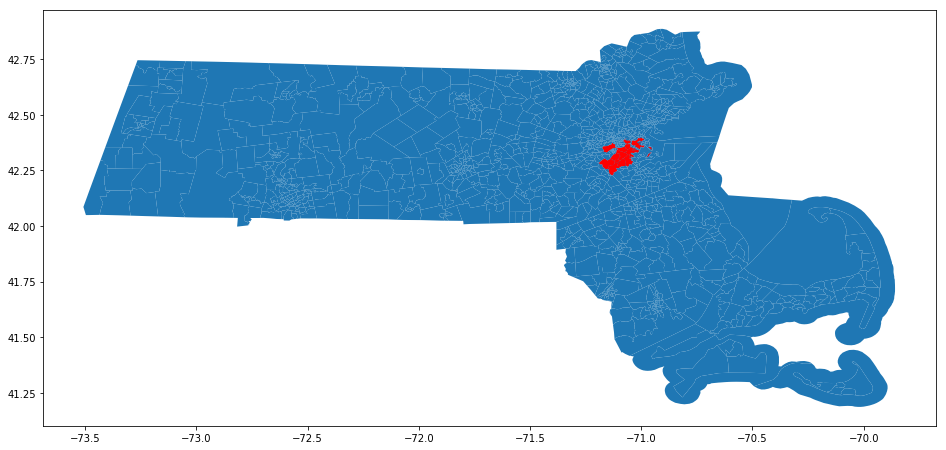

In [10]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.set_aspect('equal')

tracts.plot(ax=ax)
police_districts.plot(ax=ax, color='red')

## Calculate relevant tracts

In [11]:
%%time

unary_union = police_districts.unary_union
relevant_geoids = [geoid for geoid, geom in tracts.geometry.iteritems()
                   if geom.intersects(unary_union)]
relevant_geoids

CPU times: user 4.55 s, sys: 0 ns, total: 4.55 s
Wall time: 4.57 s


In [12]:
len(relevant_geoids)

212

## Check visually

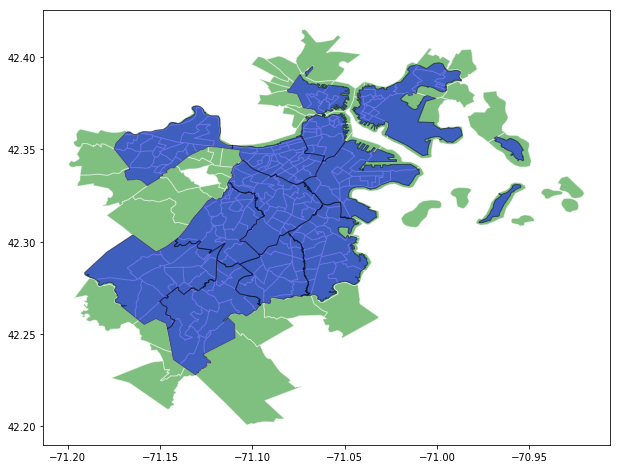

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_aspect('equal')

tracts.loc[relevant_geoids].plot(ax=ax, facecolor='green', edgecolor='white', alpha='0.5')
police_districts.plot(ax=ax, facecolor='blue', edgecolor='black', alpha=0.5)

## Calculate intersections size

In [14]:
%%time

crs = util.crs.esri102739
unary_union = police_districts.to_crs(crs).unary_union
intersection_sizes = [unary_union.intersection(geom).area
                      for geom in tracts.to_crs(crs).loc[relevant_geoids].geometry]

CPU times: user 4.94 s, sys: 9.74 ms, total: 4.95 s
Wall time: 4.97 s


In [15]:
sorted(intersection_sizes)[:20]

# square feet...
# it's hard to estabilish a cutoff point

[268.4887251476022,
 305.91297947372664,
 396.7480816841474,
 527.2625173387785,
 556.6415302724298,
 567.4788286592161,
 807.1477677273842,
 1178.0828506591897,
 1540.7926469786146,
 2218.6916696660883,
 2261.730974895549,
 2377.2033278719377,
 4426.079548598022,
 9926.910109893915,
 11243.23407402271,
 13178.580514859881,
 14261.90008339634,
 15792.579160724581,
 17227.204414291093,
 20746.90893383958]